# Risk Based Access Control : Machine Learning for Identity Threat Detection

## Loading and renaming data

In [1]:
import pandas as pd

In [2]:
chunk_size = 1000000

chunks = []
sample_fraction = 0.4

for i, chunk in enumerate(pd.read_csv("rba-dataset.csv", chunksize=chunk_size)):
    chunks.append(chunk.sample(frac=sample_fraction, random_state=1))
    print(f"chunk {i}/31")

# Concatenate all chunks into a single DataFrame
data = pd.concat(chunks, axis=0)
data.head()

chunk 0/31
chunk 1/31
chunk 2/31
chunk 3/31
chunk 4/31
chunk 5/31
chunk 6/31
chunk 7/31
chunk 8/31
chunk 9/31
chunk 10/31
chunk 11/31
chunk 12/31
chunk 13/31
chunk 14/31
chunk 15/31
chunk 16/31
chunk 17/31
chunk 18/31
chunk 19/31
chunk 20/31
chunk 21/31
chunk 22/31
chunk 23/31
chunk 24/31
chunk 25/31
chunk 26/31
chunk 27/31
chunk 28/31
chunk 29/31
chunk 30/31
chunk 31/31


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
276826,276826,2020-02-07 03:43:03.472,-296285440039579456,NaN,170.39.78.86,US,-,-,393398,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile 81.0.4044.1949,Android 6.0.99,mobile,False,False,False
849425,849425,2020-02-14 14:49:09.146,-8972452956627396509,NaN,176.107.139.65,PL,Mazovia,Warsaw,205727,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,False,False
504499,504499,2020-02-10 11:21:27.828,272548560383834071,NaN,84.208.208.127,NO,Rogaland,Stavanger,41164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,False,False,False
601054,601054,2020-02-11 12:30:44.886,-2923701650951217243,NaN,38.135.39.175,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 50.0.2661,Android 4.1,mobile,True,True,False
980221,980221,2020-02-16 12:31:08.564,-5786250162433249151,NaN,170.39.76.62,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 lik...,Chrome Mobile 80.0.3987.3058.3070,iOS 13.1.3,mobile,False,False,False


### Renaming our column

In [4]:
new_names = {
    "Login Timestamp": "timestamp",
    "User ID": "id",
    "Round-Trip Time [ms]": "rtt_ms",
    "IP Address": "ip",
    "Country": "country",
    "Region": "region",
    "City": "city",
    "ASN": "asn",
    "User Agent String": "user_agent",
    "Browser Name and Version": "browser",
    "OS Name and Version": "os",
    "Device Type": "device",
    "Login Successful": "login_success",
    "Is Attack IP": "is_attack_ip",
    "Is Account Takeover": "is_account_takeover"
}

data.rename(columns=new_names, inplace=True)
data


,index,timestamp,id,rtt_ms,ip,country,region,city,asn,user_agent,browser,os,device,login_success,is_attack_ip,is_account_takeover
276826,276826,2020-02-07 03:43:03.472,-296285440039579456,NaN,170.39.78.86,US,-,-,393398,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile 81.0.4044.1949,Android 6.0.99,mobile,False,False,False
849425,849425,2020-02-14 14:49:09.146,-8972452956627396509,NaN,176.107.139.65,PL,Mazovia,Warsaw,205727,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,False,False
504499,504499,2020-02-10 11:21:27.828,272548560383834071,NaN,84.208.208.127,NO,Rogaland,Stavanger,41164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,False,False,False
601054,601054,2020-02-11 12:30:44.886,-2923701650951217243,NaN,38.135.39.175,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 50.0.2661,Android 4.1,mobile,True,True,False
980221,980221,2020-02-16 12:31:08.564,-5786250162433249151,NaN,170.39.76.62,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 lik...,Chrome Mobile 80.0.3987.3058.3070,iOS 13.1.3,mobile,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31065068,31065068,2021-02-26 10:28:28.197,7517448027640648945,NaN,79.161.218.205,NO,Rogaland,Austre Amoy,29695,Mozilla/5.0 (iPod; CPU iPhone OS 6_1_6 like Ma...,Mobile Safari 6.0.0.3605,iOS 6.1.6,mobile,False,True,False
31196396,31196396,2021-02-28 02:47:15.792,8319034857044841296,NaN,158.149.40.81,NO,-,-,29492,Mozilla/5.0 (iPod; CPU iPhone OS 6_1_6 like Ma...,Mobile Safari 6.0.0.3605,iOS 6.1.6,mobile,True,False,False
31144309,31144309,2021-02-27 10:28:24.082,-4324475583306591935,NaN,170.39.76.156,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 81.0.4044,Android 4.1,mobile,False,False,False
31063503,31063503,2021-02-26 10:10:06.309,-4324475583306591935,NaN,179.4.0.6,CL,Los Lagos Region,Port Montt,6535,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like...,Firefox Mobile 64.0,iOS 9.3.1,mobile,False,False,False


# Data Exploration

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data.tail(10)

,index,timestamp,id,rtt_ms,ip,country,region,city,asn,user_agent,browser,os,device,login_success,is_attack_ip,is_account_takeover
31144390,31144390,2021-02-27 10:29:38.357,-5854957957059982020,NaN,80.239.48.105,NO,Rogaland,Bryne,25400,Mozilla/5.0 (iPod; CPU iPhone OS 6_1_6 like Ma...,Mobile Safari 6.0.0.3605,iOS 6.1.6,mobile,True,False,False
31125762,31125762,2021-02-27 04:56:45.829,1329526020261877346,NaN,209.236.123.254,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1933,iOS 13.4,mobile,True,True,False
31202773,31202773,2021-02-28 05:21:09.329,-6315944452724489239,545.0,195.214.202.126,NO,Oslo County,Oslo,29607,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1601,iOS 13.4,mobile,False,False,False
31261767,31261767,2021-02-28 20:26:05.472,-5544836291850598194,NaN,46.212.134.35,NO,Viken,Skjetten,41164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 72.0.3626.78,Mac OS X 10.14.6,desktop,True,False,False
31252807,31252807,2021-02-28 17:59:01.137,-8268348036855554836,NaN,170.39.77.147,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1934,iOS 13.4,mobile,False,False,False
31065068,31065068,2021-02-26 10:28:28.197,7517448027640648945,NaN,79.161.218.205,NO,Rogaland,Austre Amoy,29695,Mozilla/5.0 (iPod; CPU iPhone OS 6_1_6 like Ma...,Mobile Safari 6.0.0.3605,iOS 6.1.6,mobile,False,True,False
31196396,31196396,2021-02-28 02:47:15.792,8319034857044841296,NaN,158.149.40.81,NO,-,-,29492,Mozilla/5.0 (iPod; CPU iPhone OS 6_1_6 like Ma...,Mobile Safari 6.0.0.3605,iOS 6.1.6,mobile,True,False,False
31144309,31144309,2021-02-27 10:28:24.082,-4324475583306591935,NaN,170.39.76.156,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 81.0.4044,Android 4.1,mobile,False,False,False
31063503,31063503,2021-02-26 10:10:06.309,-4324475583306591935,NaN,179.4.0.6,CL,Los Lagos Region,Port Montt,6535,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like...,Firefox Mobile 64.0,iOS 9.3.1,mobile,False,False,False
31221007,31221007,2021-02-28 10:36:02.262,8791999668418205542,NaN,23.137.224.167,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044,iOS 13.4,mobile,False,False,False


In [11]:
data.dtypes

index                    int64
timestamp               object
id                       int64
rtt_ms                 float64
ip                      object
country                 object
region                  object
city                    object
asn                      int64
user_agent              object
browser                 object
os                      object
device                  object
login_success             bool
is_attack_ip              bool
is_account_takeover       bool
dtype: object

In [12]:
data.count()

index                  12507706
timestamp              12507706
id                     12507706
rtt_ms                   509812
ip                     12507706
country                12507706
region                 12488706
city                   12504314
asn                    12507706
user_agent             12507706
browser                12507706
os                     12507706
device                 12507077
login_success          12507706
is_attack_ip           12507706
is_account_takeover    12507706
dtype: int64

### Agent Data (OS, Device and Browser)

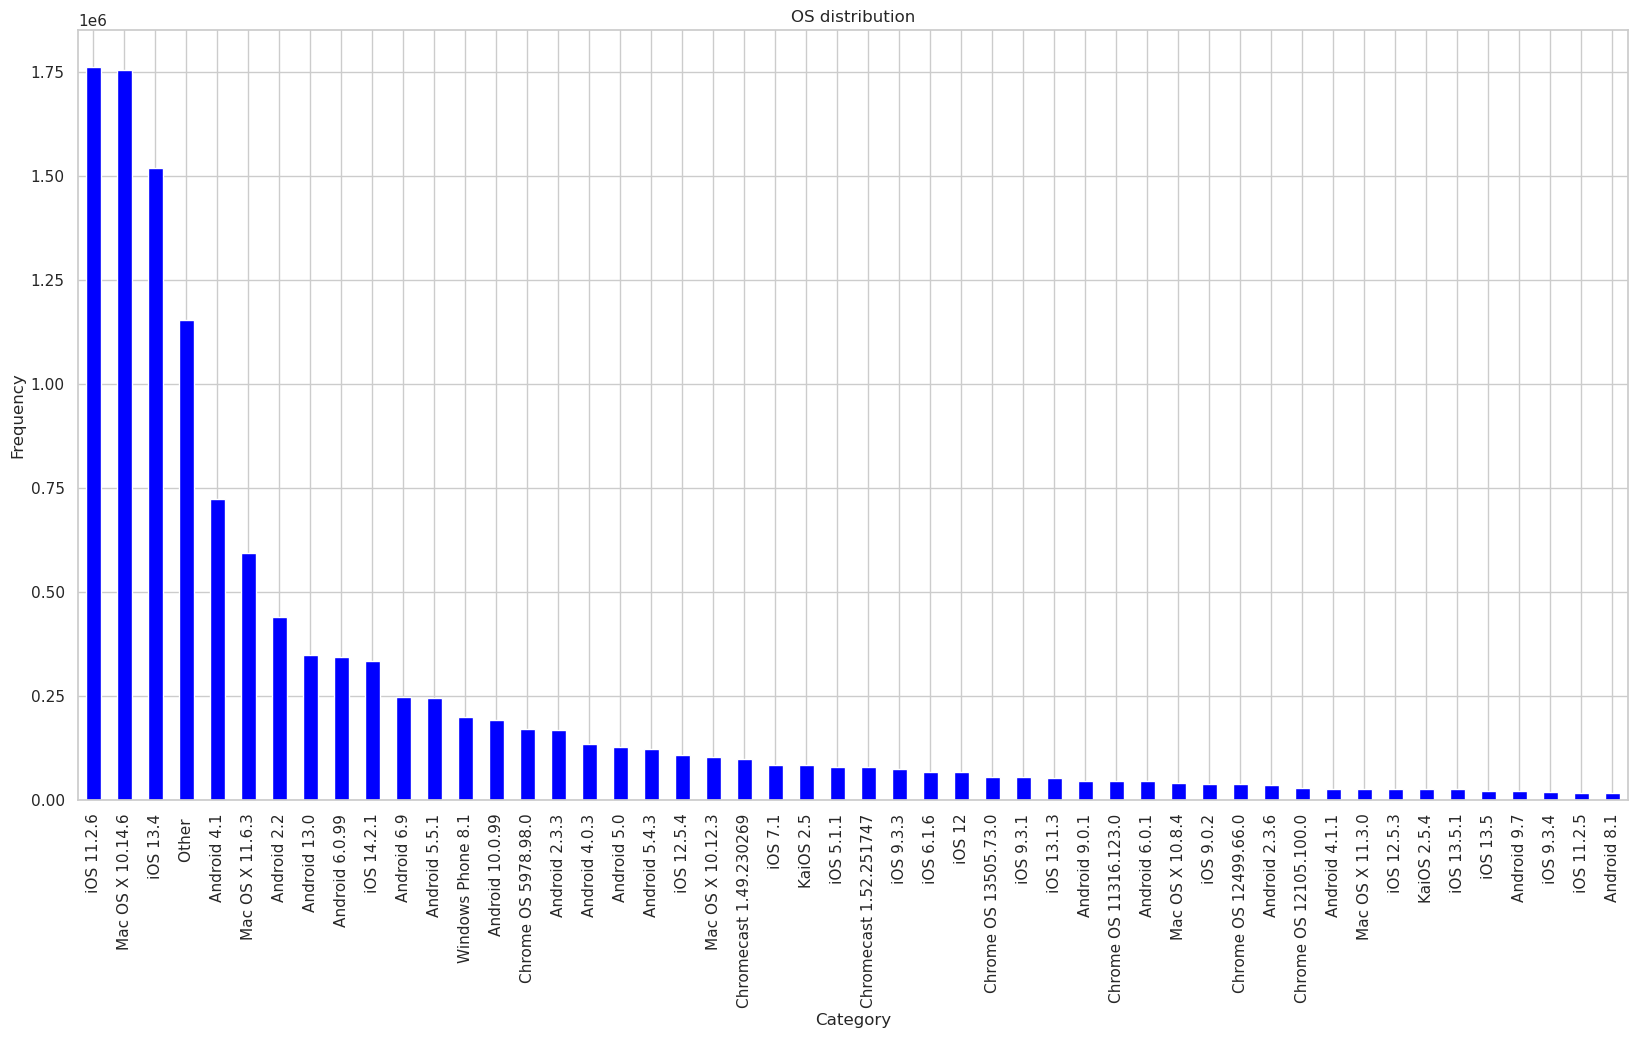

In [72]:
category_counts = data["os"].value_counts().head(50)
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='blue')
plt.title('OS distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

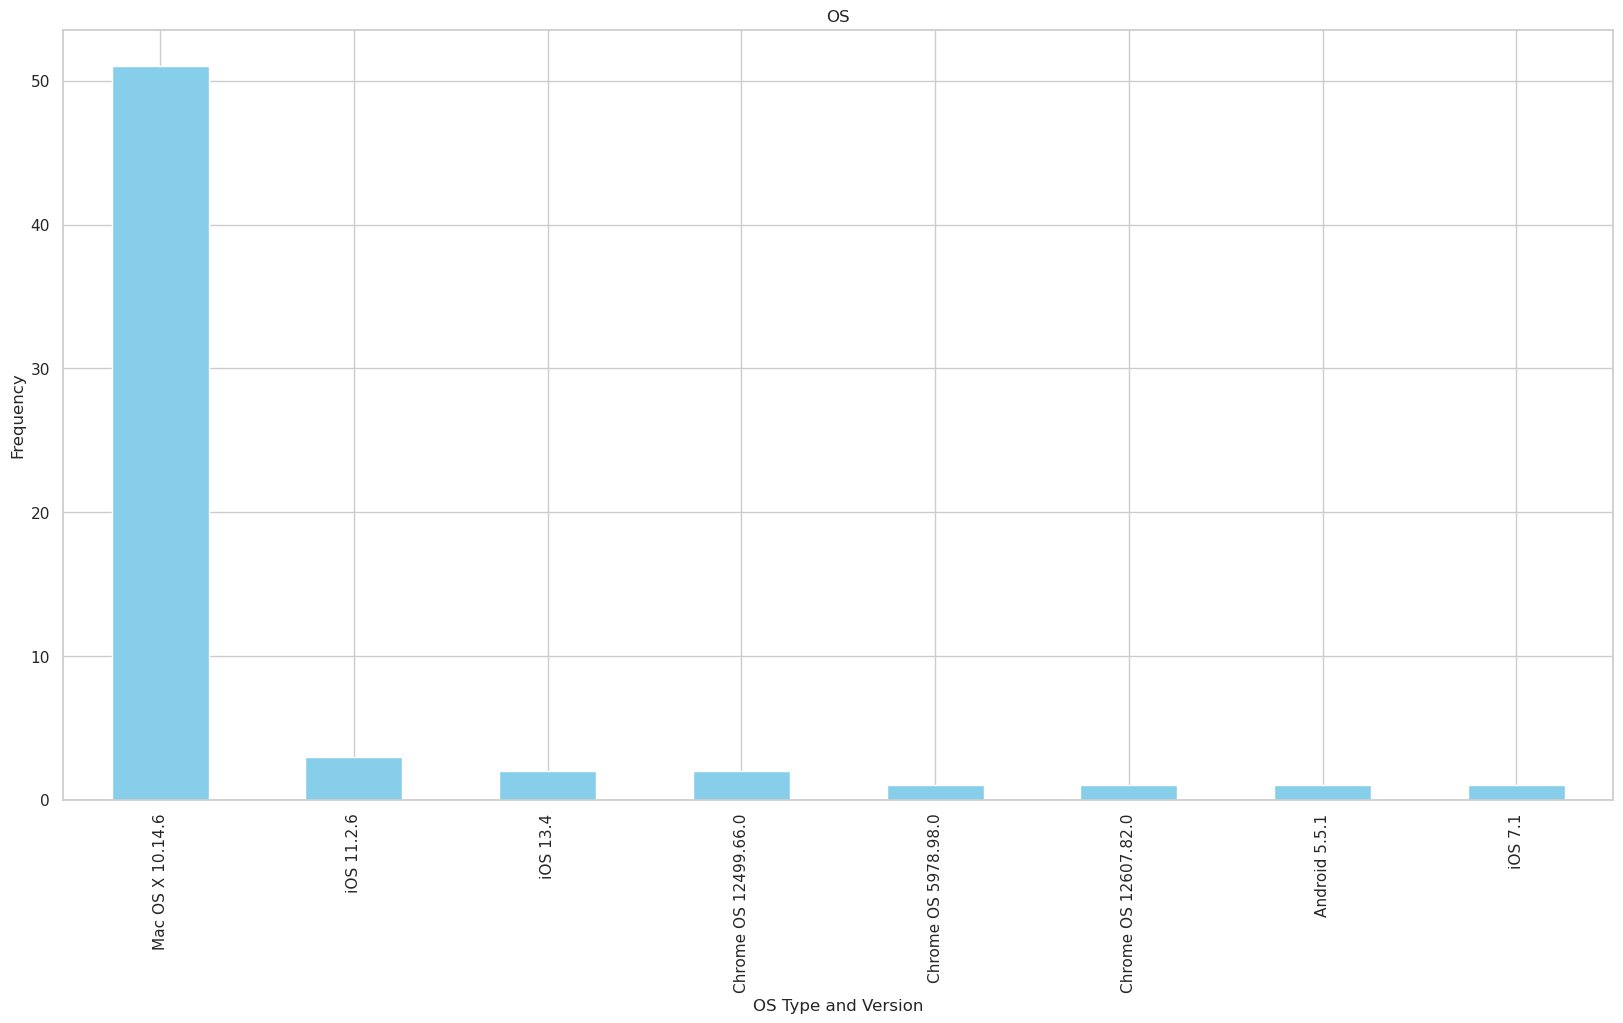

In [82]:
category_counts = data[data['is_account_takeover']==True]["os"].value_counts()
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='skyblue')
plt.title('OS distribution for attacks')
plt.xlabel('OS Type and Version')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

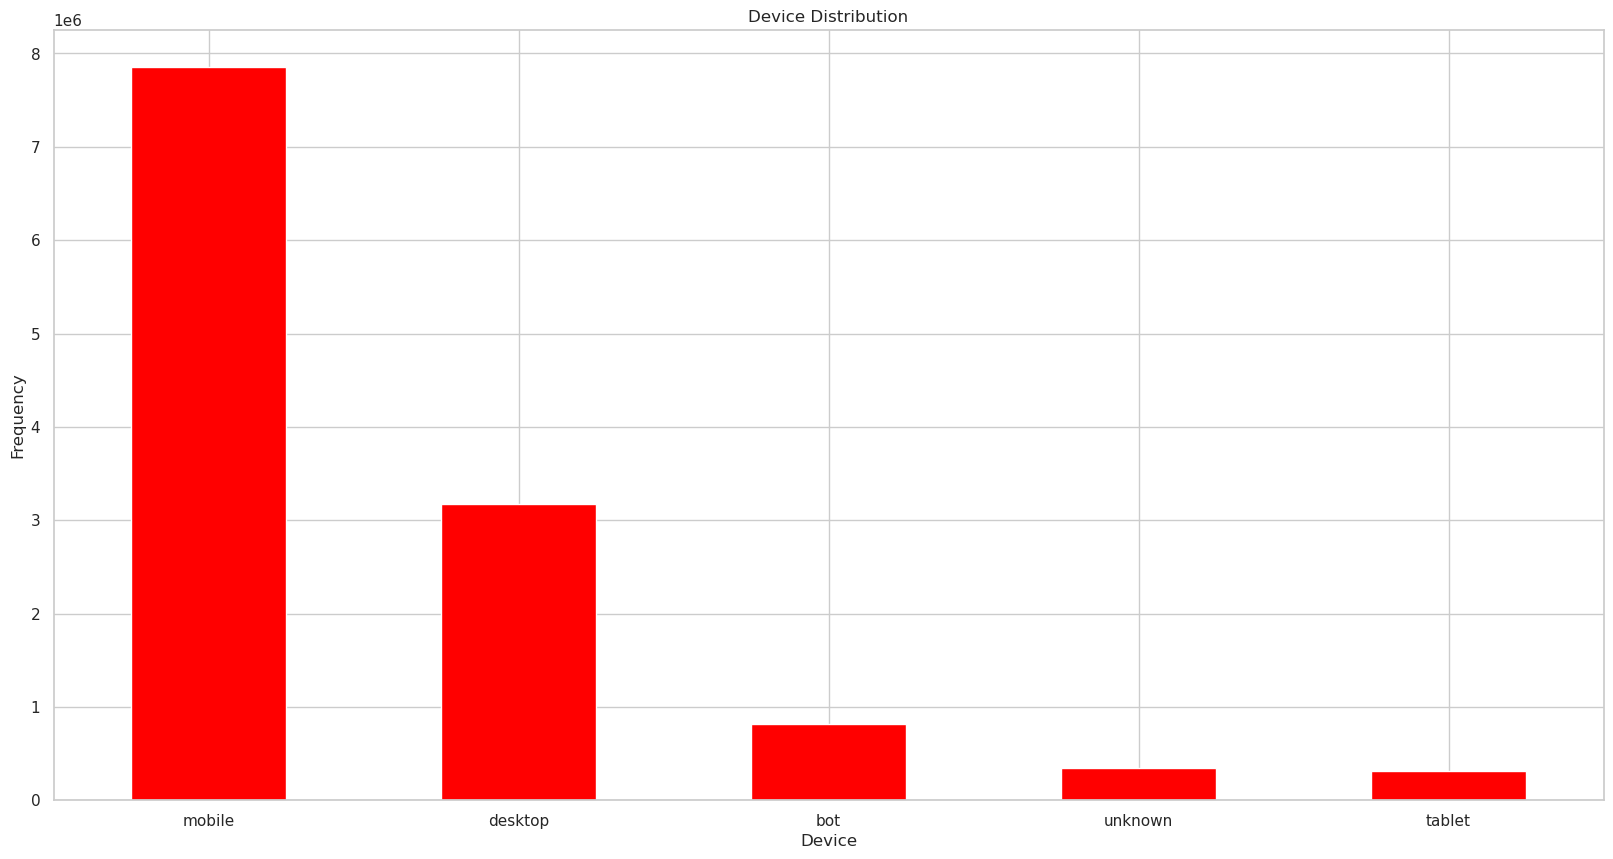

In [83]:
category_counts = data["device"].value_counts()
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='red')
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

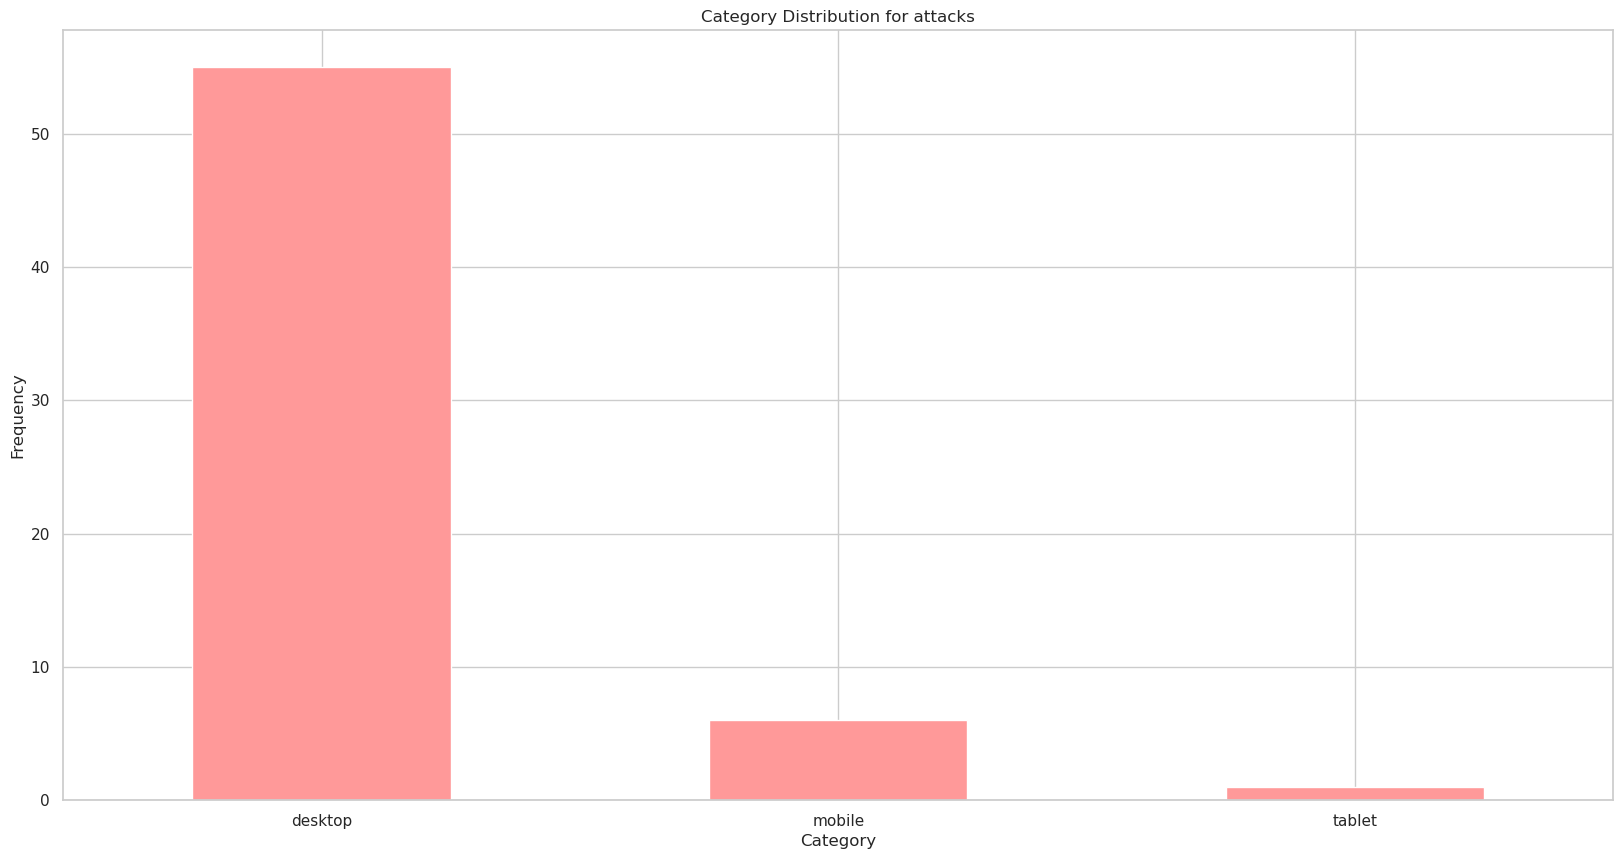

In [91]:
category_counts = data[data['is_account_takeover']==True]["device"].value_counts()
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='#FF9999')
plt.title('Category Distribution for attacks')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

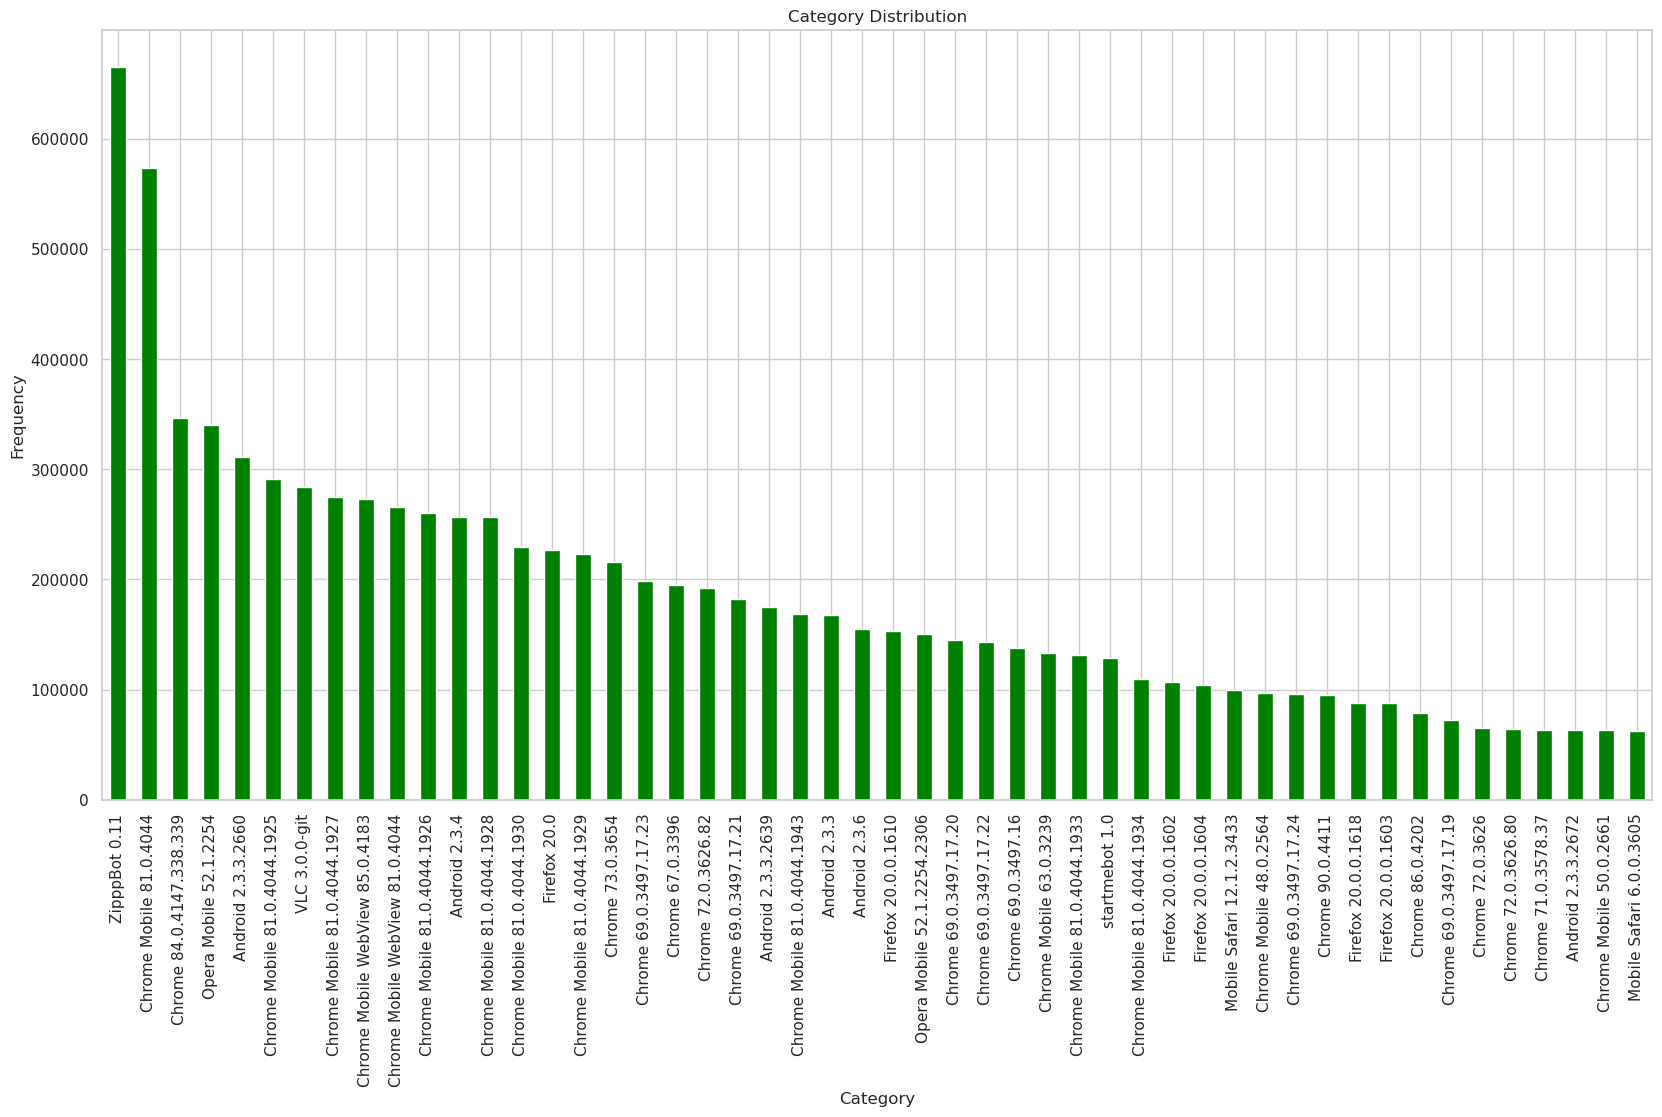

In [20]:
category_counts = data["browser"].value_counts().head(50)
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='green')
plt.title('Browser Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

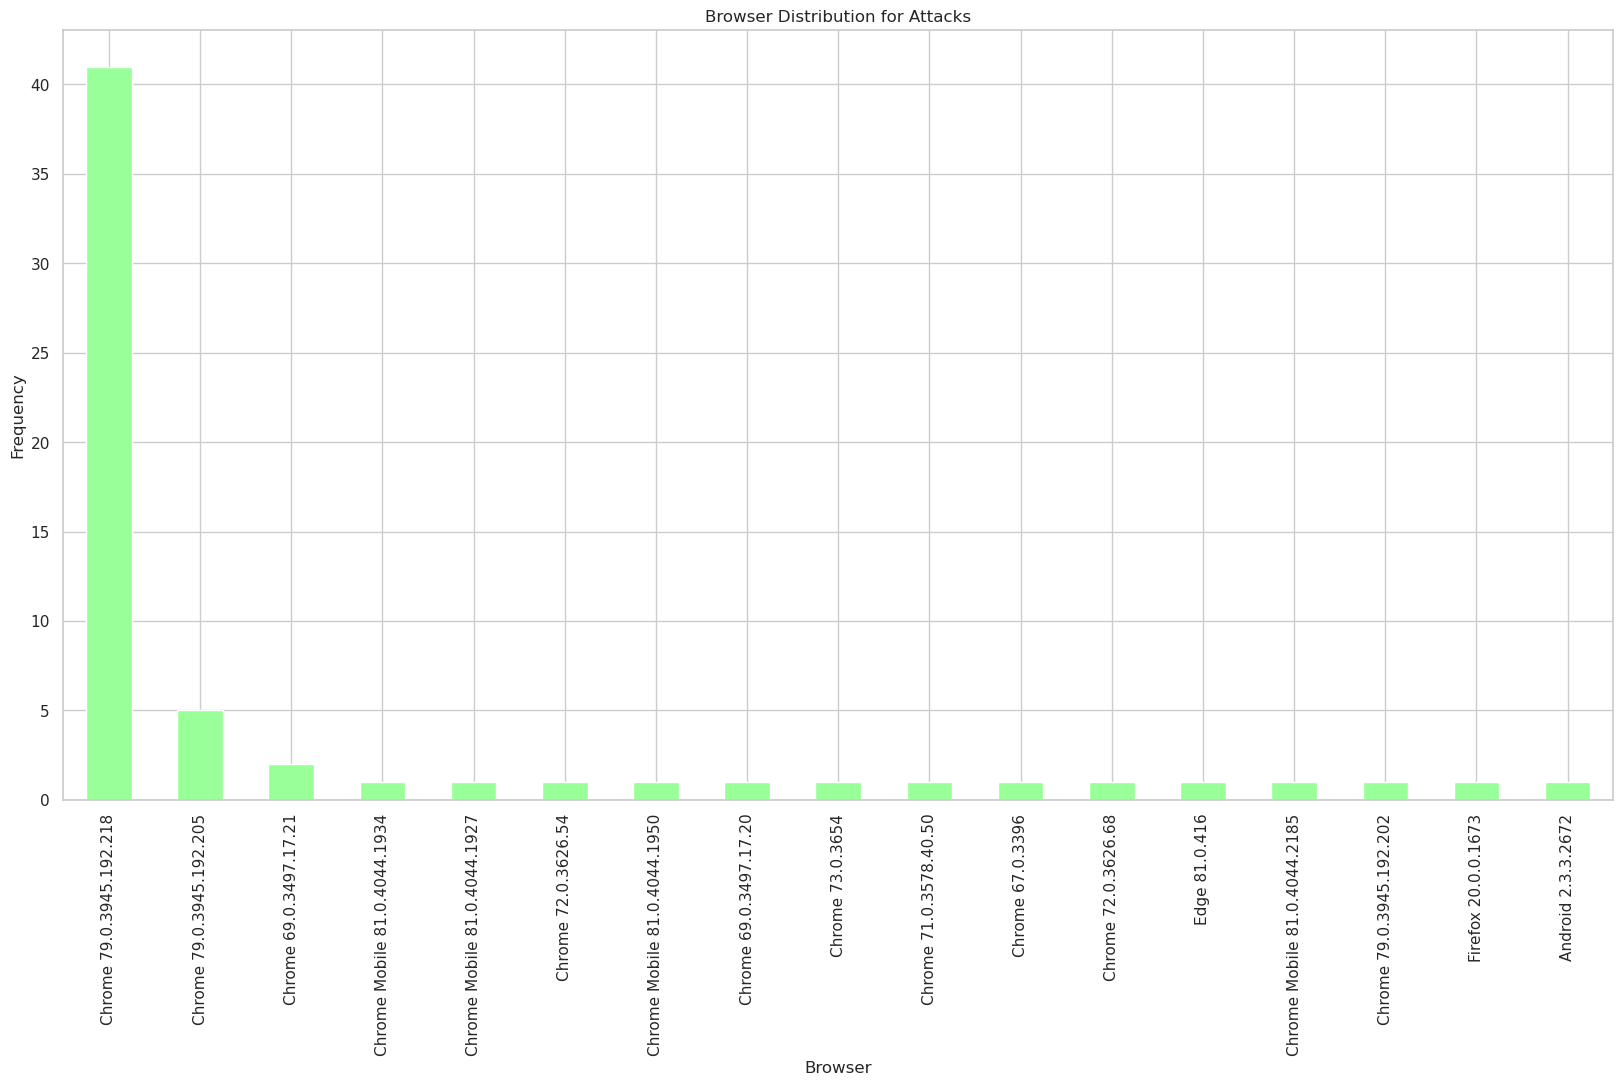

In [93]:
category_counts = data[data['is_account_takeover']==True]["browser"].value_counts().head(50)
plt.figure(figsize=(20, 10))
category_counts.plot(kind='bar', color='#99FF99')
plt.title('Browser Distribution for Attacks')
plt.xlabel('Browser')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Geographical Data

In [32]:
import plotly.express as px

In [62]:
attack_data = data[data["is_account_takeover"] == True][['country']]
normal_connections = data[data["is_account_takeover"] != True][['country']]
normal_connections

,country
276826,US
849425,PL
504499,NO
601054,US
980221,US
...,...
31065068,NO
31196396,NO
31144309,US
31063503,CL


In [65]:
iso2_to_iso3_map = {
    'AD': 'AND', 'AE': 'ARE', 'AF': 'AFG', 'AG': 'ATG', 'AI': 'AIA', 'AL': 'ALB',
    'AM': 'ARM', 'AO': 'AGO', 'AR': 'ARG', 'AS': 'ASM', 'AT': 'AUT', 'AU': 'AUS',
    'AW': 'ABW', 'AX': 'ALA', 'AZ': 'AZE', 'BA': 'BHS', 'BB': 'BRB', 'BD': 'BGD',
    'BE': 'BEL', 'BF': 'BFA', 'BG': 'BGR', 'BH': 'BHR', 'BI': 'BDI', 'BJ': 'BEN',
    'BL': 'BLM', 'BM': 'BMU', 'BN': 'BRN', 'BO': 'BOL', 'BQ': 'BES', 'BR': 'BRA',
    'BS': 'BHS', 'BT': 'BTN', 'BV': 'BVT', 'BW': 'BWA', 'BY': 'BLR', 'BZ': 'BLZ',
    'CA': 'CAN', 'CC': 'CCK', 'CD': 'COD', 'CF': 'CAF', 'CG': 'COG', 'CH': 'CHE',
    'CI': 'CIV', 'CK': 'COK', 'CL': 'CHL', 'CM': 'CMR', 'CN': 'CHN', 'CO': 'COL',
    'CR': 'CRI', 'CU': 'CUB', 'CV': 'CPV', 'CW': 'CUW', 'CX': 'CXR', 'CY': 'CYP',
    'CZ': 'CZE', 'DE': 'DEU', 'DJ': 'DJI', 'DK': 'DNK', 'DM': 'DMA', 'DO': 'DOM',
    'DZ': 'DZA', 'EC': 'ECU', 'EE': 'EST', 'EG': 'EGY', 'EH': 'ESH', 'ER': 'ERI',
    'ES': 'ESP', 'ET': 'ETH', 'FI': 'FIN', 'FJ': 'FJI', 'FM': 'FSM', 'FO': 'FRO',
    'FR': 'FRA', 'GA': 'GAB', 'GB': 'GBR', 'GD': 'GRD', 'GE': 'GEO', 'GF': 'GUF',
    'GG': 'GGY', 'GH': 'GHA', 'GI': 'GIB', 'GL': 'GRL', 'GM': 'GMB', 'GN': 'GIN',
    'GP': 'GLP', 'GQ': 'GNQ', 'GR': 'GRC', 'GT': 'GTM', 'GU': 'GUM', 'GW': 'GNB',
    'GY': 'GUY', 'HK': 'HKG', 'HM': 'HMD', 'HN': 'HND', 'HR': 'HRV', 'HT': 'HTI',
    'HU': 'HUN', 'ID': 'IDN', 'IE': 'IRL', 'IL': 'ISR', 'IM': 'IMN', 'IN': 'IND',
    'IO': 'IOT', 'IQ': 'IRQ', 'IR': 'IRN', 'IS': 'ISL', 'IT': 'ITA', 'JE': 'JEY',
    'JM': 'JAM', 'JO': 'JOR', 'JP': 'JPN', 'KE': 'KEN', 'KG': 'KGZ', 'KH': 'KHM',
    'KI': 'KIR', 'KM': 'COM', 'KN': 'KNA', 'KP': 'PRK', 'KR': 'KOR', 'KW': 'KWT',
    'KY': 'CYM', 'KZ': 'KAZ', 'LA': 'LAO', 'LB': 'LBN', 'LC': 'LCA', 'LI': 'LIE',
    'LK': 'LKA', 'LR': 'LBR', 'LS': 'LSO', 'LT': 'LTU', 'LU': 'LUX', 'LV': 'LVA',
    'LY': 'LBY', 'MA': 'MAR', 'MC': 'MCO', 'MD': 'MDA', 'ME': 'MNE', 'MF': 'MAF',
    'MG': 'MDG', 'MH': 'MHL', 'MK': 'MKD', 'ML': 'MLI', 'MM': 'MMR', 'MN': 'MNG',
    'MO': 'MAC', 'MP': 'MNP', 'MQ': 'MTQ', 'MR': 'MRT', 'MS': 'MSR', 'MT': 'MLT',
    'MU': 'MUS', 'MV': 'MDV', 'MW': 'MWI', 'MX': 'MEX', 'MY': 'MYS', 'MZ': 'MOZ',
    'NA': 'NAM', 'NC': 'NCL', 'NE': 'NER', 'NF': 'NFK', 'NG': 'NGA', 'NI': 'NIC',
    'NL': 'NLD', 'NO': 'NOR', 'NP': 'NPL', 'NR': 'NRU', 'NU': 'NIU', 'NZ': 'NZL',
    'OM': 'OMN', 'PA': 'PAN', 'PE': 'PER', 'PF': 'PYF', 'PG': 'PNG', 'PH': 'PHL',
    'PK': 'PAK', 'PL': 'POL', 'PM': 'SPM', 'PN': 'PCN', 'PR': 'PRI', 'PT': 'PRT',
    'PW': 'PLW', 'PY': 'PRY', 'QA': 'QAT', 'RE': 'REU', 'RO': 'ROU', 'RS': 'SRB',
    'RU': 'RUS', 'RW': 'RWA', 'SA': 'SAU', 'SB': 'SLB', 'SC': 'SYC', 'SD': 'SDN',
    'SE': 'SWE', 'SG': 'SGP', 'SH': 'SHN', 'SI': 'SVN', 'SJ': 'SJM', 'SK': 'SVK',
    'SL': 'SLE', 'SM': 'SMR', 'SN': 'SEN', 'SO': 'SOM', 'SR': 'SUR', 'SS': 'SSD',
    'ST': 'STP', 'SV': 'SLV', 'SX': 'SXM', 'SY': 'SYR', 'SZ': 'SWZ', 'TC': 'TCA',
    'TD': 'TCD', 'TF': 'ATF', 'TG': 'TGO', 'TH': 'THA', 'TJ': 'TJK', 'TK': 'TKL',
    'TL': 'TLS', 'TM': 'TKM', 'TN': 'TUN', 'TO': 'TON', 'TR': 'TUR', 'TT': 'TTO',
    'TV': 'TUV', 'TZ': 'TZA', 'UA': 'UKR', 'UG': 'UGA', 'UM': 'UMI', 'US': 'USA',
    'UY': 'URY', 'UZ': 'UZB', 'VA': 'VAT', 'VC': 'VCT', 'VE': 'VEN', 'VG': 'VGB',
    'VI': 'VIR', 'VN': 'VNM', 'VU': 'VUT', 'WF': 'WLF', 'WS': 'WSM', 'YE': 'YEM',
    'YT': 'MYT', 'ZA': 'ZAF', 'ZM': 'ZMB', 'ZW': 'ZWE'
}

def iso2_to_iso3(iso2):
    return iso2_to_iso3_map.get(iso2.upper(), iso2)


attack_data['country'] = data['country'].apply(iso2_to_iso3)
normal_connections['country'] = data['country'].apply(iso2_to_iso3)

In [66]:
attack_counts = attack_data.groupby("country").size().reset_index(name="Attack Count")
normal_connections = normal_connections.groupby("country").size().reset_index(name="Connections Count")

,country,Connections Count
0,BGD,1
1,BRA,5
2,DEU,3
3,FIN,1
4,GBR,1
5,IDN,4
6,IND,2
7,NOR,53
8,POL,2
9,ROU,1


In [70]:
attack_counts.sort_values(by='Attack Count' , ascending=False)

,country,Attack Count
11,ROU,35
0,BRA,5
1,CAN,4
9,NOR,4
2,CHL,3
5,ITA,3
4,DNK,2
3,CZE,1
6,LVA,1
7,MOZ,1


In [67]:
fig = px.choropleth(
    attack_counts,
    locations="country",
    locationmode="ISO-3",
    color="Attack Count",
    title="Number of Attacks by Country",
    color_continuous_scale="Reds"
)
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

In [71]:
normal_connections.sort_values(by='Connections Count' , ascending=False)

,country,Connections Count
7,NOR,53
10,USA,21
1,BRA,5
5,IDN,4
2,DEU,3
6,IND,2
8,POL,2
0,BGD,1
3,FIN,1
4,GBR,1


In [68]:
fig = px.choropleth(
    normal_connections,
    locations="country",
    locationmode="ISO-3",
    color="Connections Count",
    title="Map of Normal Connections by Country",
    color_continuous_scale="Blues"
)
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

In [ ]:
## Data Cleaning

In [26]:
data[data['Is Account Takeover'] == True].count()

index                       62
Login Timestamp             62
User ID                     62
Round-Trip Time [ms]         1
IP Address                  62
Country                     62
Region                      61
City                        62
ASN                         62
User Agent String           62
Browser Name and Version    62
OS Name and Version         62
Device Type                 62
Login Successful            62
Is Attack IP                62
Is Account Takeover         62
dtype: int64

In [11]:
data['Browser Name and Version'].value_counts().sort_values()

Browser Name and Version
Firefox 20.0.0.1794              1
NetFront NX                      1
Chrome 80.0.3987.252.261         1
Iron 66.0.3450.1128              1
Chrome 90.0.4411.597             1
                             ...  
Android 2.3.3.2660          310794
Opera Mobile 52.1.2254      340211
Chrome 84.0.4147.338.339    346107
Chrome Mobile 81.0.4044     573373
ZipppBot 0.11               665514
Name: count, Length: 3654, dtype: int64

In [5]:
data.dtypes.all

<bound method Series.all of index                         int64
Login Timestamp              object
User ID                       int64
Round-Trip Time [ms]        float64
IP Address                   object
Country                      object
Region                       object
City                         object
ASN                           int64
User Agent String            object
Browser Name and Version     object
OS Name and Version          object
Device Type                  object
Login Successful               bool
Is Attack IP                   bool
Is Account Takeover            bool
dtype: object>

In [27]:
data['Device Type'].unique()

array(['mobile', 'desktop', 'tablet', 'bot', 'unknown', nan], dtype=object)

In [28]:
takeovers = data[data['Is Account Takeover'] == True]
takeovers

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
482034,482034,2020-02-10 05:51:00.938,-5783801028078876142,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
100085,100085,2020-02-04 17:15:42.743,-6380256063165146454,NaN,31.131.16.24,RO,-,-,56851,Mozilla/5.0 (X11; CrOS armv7l 5978.98.0) Appl...,Chrome 71.0.3578.40.50,Chrome OS 5978.98.0,desktop,True,True,True
482102,482102,2020-02-10 05:52:45.031,6969491805167028251,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
482566,482566,2020-02-10 06:05:11.464,5780471454460598558,NaN,2.56.166.10,RO,-,-,3280,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,True,True
82873,82873,2020-02-04 13:45:50.280,5519106287451092780,NaN,10.4.1.162,IT,Provincia di Treviso,Treviso,503109,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19207631,19207631,2020-10-27 06:38:53.830,-3972673265324911418,NaN,5.180.170.179,RO,-,-,206801,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.205,Mac OS X 10.14.6,desktop,True,True,True
20623917,20623917,2020-11-13 08:13:22.285,-249028206650900290,NaN,91.220.63.239,RO,Bucuresti,Bucharest,197357,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Chrome Mobile 81.0.4044.1927,iOS 13.4,mobile,True,True,True
20397967,20397967,2020-11-10 15:37:46.485,-7106532841606442929,NaN,10.4.97.148,RO,Braila,Braila,61353,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.218,Mac OS X 10.14.6,desktop,True,False,True
20700950,20700950,2020-11-14 07:06:48.691,-1639909578889655226,NaN,5.180.170.198,RO,-,-,206801,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.205,Mac OS X 10.14.6,desktop,True,True,True


In [29]:
data.isnull().sum()

index                              0
Login Timestamp                    0
User ID                            0
Round-Trip Time [ms]        11997894
IP Address                         0
Country                            0
Region                         19000
City                            3392
ASN                                0
User Agent String                  0
Browser Name and Version           0
OS Name and Version                0
Device Type                      629
Login Successful                   0
Is Attack IP                       0
Is Account Takeover                0
dtype: int64

In [ ]:
##

# Data Preprocessing

### Extracting Time Data

In [30]:
data['Login Timestamp'] = pd.to_datetime(data['Login Timestamp'], errors='coerce')

In [ ]:
data['Hour'] = data['Login Timestamp'].dt.hour
data['DayOfWeek'] = data['Login Timestamp'].dt.day_name()
data

### Extracting geography Data

In [11]:
data.fillna({'City': 'Unknown'}, inplace=True)
data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Hour,DayOfWeek
276826,276826,2020-02-07 03:43:03.472,-296285440039579456,NaN,170.39.78.86,US,-,-,393398,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile 81.0.4044.1949,Android 6.0.99,mobile,False,False,False,3,Friday
849425,849425,2020-02-14 14:49:09.146,-8972452956627396509,NaN,176.107.139.65,PL,Mazovia,Warsaw,205727,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,False,False,14,Friday
504499,504499,2020-02-10 11:21:27.828,272548560383834071,NaN,84.208.208.127,NO,Rogaland,Stavanger,41164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,False,False,False,11,Monday
601054,601054,2020-02-11 12:30:44.886,-2923701650951217243,NaN,38.135.39.175,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 50.0.2661,Android 4.1,mobile,True,True,False,12,Tuesday
980221,980221,2020-02-16 12:31:08.564,-5786250162433249151,NaN,170.39.76.62,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 lik...,Chrome Mobile 80.0.3987.3058.3070,iOS 13.1.3,mobile,False,False,False,12,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31019674,31019674,2021-02-25 19:03:47.699,-4324475583306591935,NaN,10.0.181.214,JP,-,-,262582,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 72.0.3626.82,Mac OS X 11.6.3,desktop,False,False,False,19,Thursday
31140991,31140991,2021-02-27 09:39:13.844,-4324475583306591935,NaN,170.39.78.36,US,-,-,393398,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 86.0.4240,Android 2.2,mobile,False,False,False,9,Saturday
31195418,31195418,2021-02-28 02:21:01.374,-4324475583306591935,NaN,10.0.181.209,CA,Quebec,Inverness,262582,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 72.0.3626.82,Mac OS X 11.6.3,desktop,False,False,False,2,Sunday
31245900,31245900,2021-02-28 16:26:26.859,-4324475583306591935,NaN,10.0.77.230,NO,Oslo County,Oslo,29695,AwarioSmartBot/1.0 (en-us) variation/294821,AwarioSmartBot 1.0,Other,unknown,False,False,False,16,Sunday


### Agent and Device Data

In [12]:
data['Browser'] = data['Browser Name and Version'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
data['OS'] = data['OS Name and Version'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
data.fillna({'Device Type': 'Unknown'}, inplace=True)
data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Hour,DayOfWeek,Browser,OS
276826,276826,2020-02-07 03:43:03.472,-296285440039579456,NaN,170.39.78.86,US,-,-,393398,Mozilla/5.0 (Android 6.0.99; Tablet; https://...,Chrome Mobile 81.0.4044.1949,Android 6.0.99,mobile,False,False,False,3,Friday,Chrome,Android
849425,849425,2020-02-14 14:49:09.146,-8972452956627396509,NaN,176.107.139.65,PL,Mazovia,Warsaw,205727,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,False,False,False,14,Friday,Chrome,iOS
504499,504499,2020-02-10 11:21:27.828,272548560383834071,NaN,84.208.208.127,NO,Rogaland,Stavanger,41164,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_...,Chrome 73.0.3654,Mac OS X 10.14.6,desktop,False,False,False,11,Monday,Chrome,Mac
601054,601054,2020-02-11 12:30:44.886,-2923701650951217243,NaN,38.135.39.175,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 50.0.2661,Android 4.1,mobile,True,True,False,12,Tuesday,Chrome,Android
980221,980221,2020-02-16 12:31:08.564,-5786250162433249151,NaN,170.39.76.62,US,-,-,393398,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 lik...,Chrome Mobile 80.0.3987.3058.3070,iOS 13.1.3,mobile,False,False,False,12,Sunday,Chrome,iOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31019674,31019674,2021-02-25 19:03:47.699,-4324475583306591935,NaN,10.0.181.214,JP,-,-,262582,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 72.0.3626.82,Mac OS X 11.6.3,desktop,False,False,False,19,Thursday,Chrome,Mac
31140991,31140991,2021-02-27 09:39:13.844,-4324475583306591935,NaN,170.39.78.36,US,-,-,393398,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 86.0.4240,Android 2.2,mobile,False,False,False,9,Saturday,Chrome,Android
31195418,31195418,2021-02-28 02:21:01.374,-4324475583306591935,NaN,10.0.181.209,CA,Quebec,Inverness,262582,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_6_3...,Chrome 72.0.3626.82,Mac OS X 11.6.3,desktop,False,False,False,2,Sunday,Chrome,Mac
31245900,31245900,2021-02-28 16:26:26.859,-4324475583306591935,NaN,10.0.77.230,NO,Oslo County,Oslo,29695,AwarioSmartBot/1.0 (en-us) variation/294821,AwarioSmartBot 1.0,Other,unknown,False,False,False,16,Sunday,AwarioSmartBot,Other


### Extracting Time Data

In [13]:
filtered_columns = ['City', 'ASN', 'Browser', 'OS', 'Device Type', 'Login Successful', 'Is Account Takeover', 'Hour', 'DayOfWeek']
data_filtered = data[filtered_columns]
data_filtered

,City,ASN,Browser,OS,Device Type,Login Successful,Is Account Takeover,Hour,DayOfWeek
276826,-,393398,Chrome,Android,mobile,False,False,3,Friday
849425,Warsaw,205727,Chrome,iOS,mobile,False,False,14,Friday
504499,Stavanger,41164,Chrome,Mac,desktop,False,False,11,Monday
601054,-,393398,Chrome,Android,mobile,True,False,12,Tuesday
980221,-,393398,Chrome,iOS,mobile,False,False,12,Sunday
...,...,...,...,...,...,...,...,...,...
31019674,-,262582,Chrome,Mac,desktop,False,False,19,Thursday
31140991,-,393398,Chrome,Android,mobile,False,False,9,Saturday
31195418,Inverness,262582,Chrome,Mac,desktop,False,False,2,Sunday
31245900,Oslo,29695,AwarioSmartBot,Other,unknown,False,False,16,Sunday


### Working with Categorical Data

In [14]:
categorical_columns_hot = ['OS', 'Device Type', 'Hour', 'DayOfWeek', 'Browser', 'Device Type', 'OS']
data_filtered = pd.get_dummies(data_filtered, columns=categorical_columns_hot)

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_features_label = ['City', 'ASN', 'Login Successful']
label_encoders = {}

for col in categorical_features_label:
    le = LabelEncoder() 
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

In [16]:
data_filtered

,City,ASN,Login Successful,Is Account Takeover,OS_134,OS_Android,OS_BlackBerry,OS_Chrome,OS_Chromecast,OS_DIGIHOME,...,OS_Roku,OS_Slackware,OS_Solaris,OS_Symbian,OS_Symbian^3,OS_Tizen,OS_Ubuntu,OS_WebTV,OS_Windows,OS_iOS
276826,5,3946,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
849425,20101,3364,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
504499,17866,1485,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
601054,5,3946,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
980221,5,3946,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31019674,5,3622,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31140991,5,3946,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31195418,8143,3622,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31245900,13497,997,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
data_filtered.dtypes

City                   int64
ASN                    int64
Login Successful       int64
Is Account Takeover     bool
OS_134                  bool
                       ...  
OS_Tizen                bool
OS_Ubuntu               bool
OS_WebTV                bool
OS_Windows              bool
OS_iOS                  bool
Length: 225, dtype: object

## Training Model

In [18]:
from sklearn.model_selection import train_test_split

X = data_filtered.drop('Is Account Takeover', axis=1)
Y = data_filtered['Is Account Takeover']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    625383
        True       1.00      0.00      0.00         3

    accuracy                           1.00    625386
   macro avg       1.00      0.50      0.50    625386
weighted avg       1.00      1.00      1.00    625386

